Dataset - https://www.kaggle.com/datasets/niharika41298/egg-production-dataset-state-wise-india
Objective - Visualise statewise egg production in India using geospatial analysis technique

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

Read the csv file

In [47]:
df_eggs = pd.read_csv(r"D:\github\DataScience\Kaggle\egg_dataset_state_wise\eggs.csv")
df_eggs.head(5)

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20
0,Andaman and Nicobar Islands,530,477,535,622,618,657,672,780,741,1193,861,989,1032,1074,1139,1189
1,Andhra Pradesh#,158040,164534,159411,175884,183446,193958,201277,212103,222974,227875,130958,141743,158274,177776,197545,219275
2,Arunachal Pradesh,90,73,73,394,361,380,407,53,439,400,417,427,495,550,595,605
3,Assam,5216,5359,5350,4910,4659,4671,4707,4705,4710,4717,4728,4740,4771,4952,5015,5149
4,Bihar,7894,10012,9454,10707,10740,11002,7446,7552,8372,9308,9845,10021,11117,12185,17633,27408


EDA - exploratory data analysis
Objective is to see the correctness of the dataset such as null values , check for garbage data NaN

In [48]:
## check for dataframe columns
df_eggs.columns

Index(['State/Union Territory', '2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20'],
      dtype='object')

In [49]:
## check for NaN , empty values for each columns
df_eggs['2004-05'].describe()

count      37
unique     37
top       530
freq        1
Name: 2004-05, dtype: object

In [50]:
df_eggs["2004-05"].isnull().values.any()

False

In [51]:
##loop over all columns in dataframe to check for null
for col in df_eggs:
    print(col,df_eggs[col].isnull().values.any())

State/Union Territory False
2004-05 False
2005-06 False
2006-07 False
2007-08 False
2008-09 False
2009-10 False
2010-11 False
2011-12 False
2012-13 False
2013-14 False
2014-15 False
2015-16 False
2016-17 False
2017-18 False
2018-19 False
2019-20 False


In [52]:
##loop over all columns in dataframe to check for non numeric and coerce them to 0
for col in df_eggs:
    if col != 'State/Union Territory':
        df_eggs[col] = pd.to_numeric(df_eggs[col], errors='coerce').fillna(0)

Check for unique rows i.e. states

In [53]:
##check unique  values for column states
df_eggs['State/Union Territory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh#',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'ALL INDIA'], dtype=object)

The data has one column showing for All India . For our analysis this record needs to be removed from dataframe
as we are going to compare statewise data. State name for Andra Pradhesh has # , which needs to be removed
Secodly one state has '&'  and another has 'and' . For common convention let us have '&'

Plot muliple columns after data cleaning

c:\python\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

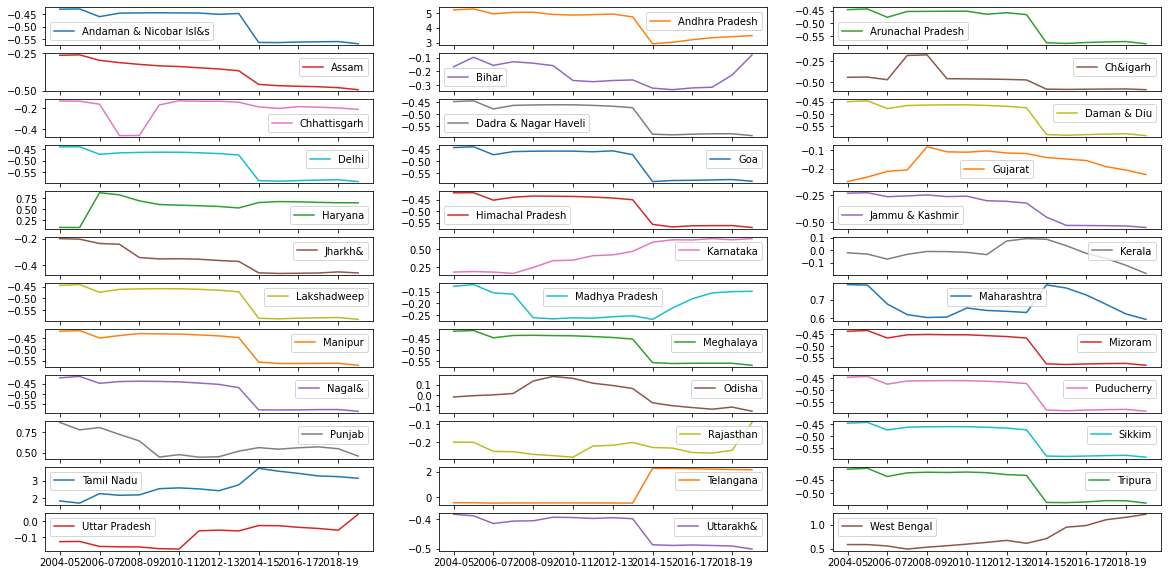

In [54]:
# plot multiple columns such as population and year from dataframe
#remove the record for All India as we are analysing state wise data
df_eggs['State/Union Territory'] = df_eggs['State/Union Territory'].apply(lambda x: x.replace('#',""))
df_eggs['State/Union Territory'] = df_eggs['State/Union Territory'].apply(lambda x: x.replace('and',"&  "))

df_eggs_state = df_eggs[df_eggs["State/Union Territory"]!="ALL INDIA"]
cols = ['2004-05', '2005-06', '2006-07', '2007-08',
       '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14',
       '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

df_eggs_state[cols] = StandardScaler().fit_transform(df_eggs_state[cols])
df_eggs_state.set_index("State/Union Territory",inplace=True)
#transpose dataframe so that state becomes column wise data
df_eggs_state = df_eggs_state.T
df_eggs_state.head(5)

#display plot
df_eggs_state=df_eggs_state.astype(float)
df_eggs_state.plot(subplots=True, figsize=(20, 10), layout=(12, 3))

Interesting trend analysis
States which have seen a steep decline in production over the years
Assam
Jharkand
Lakshadep
Manipur
Nagaland

States which have seen an increase in production over the years
Karnatka
West Bengal

State for which initial data is missing and then maintened steady production
Telangana



Geo spatial analysis for last year 2019-20

In [55]:
df_eggs_last_year = df_eggs[df_eggs["State/Union Territory"]!="ALL INDIA"]
df_eggs_last_year = df_eggs_last_year.loc[:, ["State/Union Territory",'2019-20']]
df_eggs_last_year.head(5)

,State/Union Territory,2019-20
0,Andaman & Nicobar Isl&s,1189
1,Andhra Pradesh,219275
2,Arunachal Pradesh,605
3,Assam,5149
4,Bihar,27408


Read shape file - for GIS data

In [56]:
shp_gdf = gpd.read_file('D:\github\DataScience\Kaggle\India GIS Data\India States\Indian_states.shp')
shp_gdf.head(30)

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [57]:
merged = shp_gdf.set_index('st_nm').join(df_eggs_last_year.set_index('State/Union Territory'),how='right')
merged.head()

,geometry,2019-20
State/Union Territory,,
Andaman & Nicobar Isl&s,None,1189
Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...",219275
Arunachal Pradesh,None,605
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",5149
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",27408


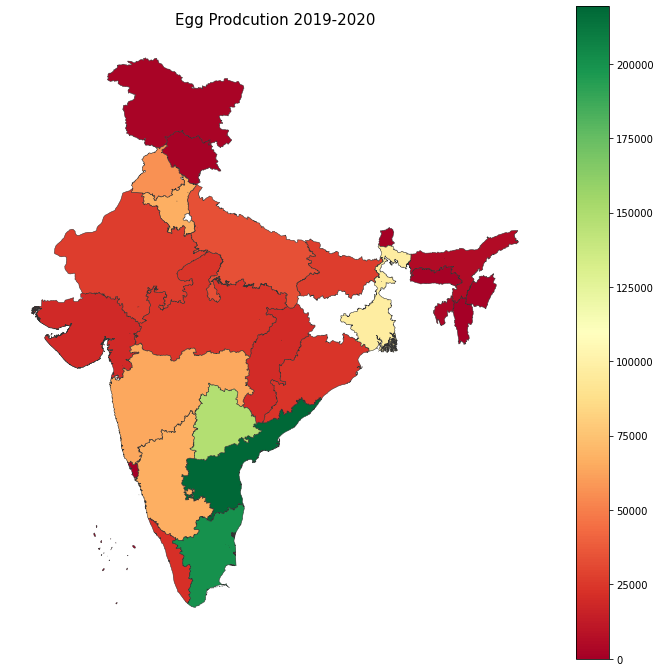

In [58]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Egg Prodcution 2019-2020',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='2019-20', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)